# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
current_btc_response = requests.get(btc_url).json()
current_btc_price = current_btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
current_eth_response = requests.get(eth_url).json()
current_eth_price = current_eth_response["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42769.20
The current value of your 5.3 ETH is $11953.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-18", tz="Australia/Perth").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    end = today,
    limit=1000
).df

print(f"Today time:{today}")
# Preview DataFrame
df_portfolio.head()


Today time:2021-06-18T00:00:00+08:00


AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.0100  109.08   1681516.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-06-27 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355.0  
2017-06-29 00:00:00-04:00  243.66  243.720  239.955  241.39  87799860.0  
2017-06-30 00:00:00-04:00  242.26  242.710  241.575  241.77  50347309.0  
2017-07-03 00:00:00-04:00  242.91  243.380  242.290  242.32  27234078.0

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop null value
df_closing_prices = df_closing_prices.dropna()
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Print AGG and SPY close prices
agg_close_price = df_closing_prices["AGG"][-1]
spy_close_price = df_closing_prices["SPY"][-1]

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.99
Current SPY closing price: $421.97


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22998.00
The current value of your 50 SPY shares is $21098.50


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_share = my_agg_value + my_spy_value
 
data = [total_crypto, total_share]

# Create savings DataFrame
df_savings = pd.DataFrame(data, columns = ["amount"], index = ["crypto", "share"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,54722.82
share,44096.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

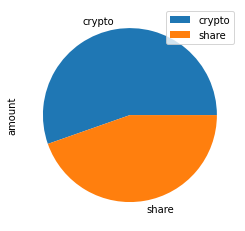

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = total_crypto + total_share

# Validate saving health
if total_saving > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_saving == emergency_fund:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You are ${emergency_fund - total_saving} away from reaching the financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='Australia/Perth').isoformat()
end_date = pd.Timestamp('2021-06-18', tz='Australia/Perth').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
stock_tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_barset(
    stock_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df
# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.0100  109.08   1681516.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-06-27 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355.0  
2017-06-29 00:00:00-04:00  243.66  243.720  239.955  241.39  87799860.0  
2017-06-30 00:00:00-04:00  242.26  242.710  241.575  241.77  50347309.0  
2017-07-03 00:00:00-04:00  242.91  243.380  242.290  242.32  27234078.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data

MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.0100  109.08   1681516.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-06-27 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-06-28 00:00:00-04:00     0.000182  242.50  243.715  242.230  243.46   
2017-06-29 00:00:00-04:00    -0.001912  243.66  243.720  239.955  241.39   
2017-06-30 00:00:00-04:00    -0.001368  242.26  242.710  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.380  242.290  242.32   

                                                    
                               volume daily_return  
time                                                
2017-06-27 00:00:00-04:00         NaN          NaN  
2017-06-28 00:00:00-04:00  50076355.0          NaN  
2017-06-29 00:00:00-04:00  87799860.0    -0.008502  
2017-06-30 00:00:00-04:00  50347309.0     0.001574  
2017-07-03 00:00:00-04:00  27234078.0     0.002275

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004554,1.004977,1.003094,0.986878,0.997263,0.990279,0.992746,0.995853,1.012138,0.997135,...,1.005641,0.993118,0.999974,0.998212,0.993356,1.005046,1.006543,0.997854,1.003933,0.994376
2,1.012191,1.017236,1.004530,0.988046,0.993936,0.993612,0.968505,0.992629,1.009337,0.987849,...,1.010173,1.002544,1.002620,0.991545,1.001158,1.007814,1.000091,0.981786,1.017401,0.994826
3,1.005155,1.011426,1.017344,0.993414,0.997790,0.975055,0.970251,1.002811,1.008709,0.996922,...,1.016435,1.011435,0.992515,0.981412,0.996568,0.998266,0.992728,0.980870,1.023265,0.981838
4,1.011322,1.014700,1.031800,0.985337,0.995779,0.976105,0.968066,0.996803,1.012467,0.992253,...,1.016538,1.013214,0.991981,0.982588,1.000540,0.988710,0.982602,0.983752,1.032726,0.972901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.668881,16.976220,13.759732,10.329033,14.925009,12.924542,42.028752,27.240735,30.674103,13.666891,...,15.160618,12.093005,26.789434,23.274259,22.559335,31.801134,19.487952,23.966449,21.317497,22.441007
7557,7.584549,16.965187,13.908463,10.187624,15.069062,12.828338,42.224651,27.475031,30.936380,13.718316,...,15.007394,12.168683,26.935993,23.048981,22.353529,31.992115,19.427138,24.214632,21.164460,22.542767
7558,7.594832,16.811551,13.811562,10.306012,15.185439,12.799666,42.353080,27.472024,31.314627,13.767711,...,14.940328,12.084800,27.451040,23.105076,22.508967,32.081842,19.254670,24.395382,20.982368,22.681998
7559,7.612447,16.794297,13.667675,10.319777,15.081398,12.933171,42.579928,27.584624,31.576509,13.735300,...,15.051337,11.967632,27.607013,23.408504,22.514915,32.311870,19.207642,24.290331,20.801435,22.754989


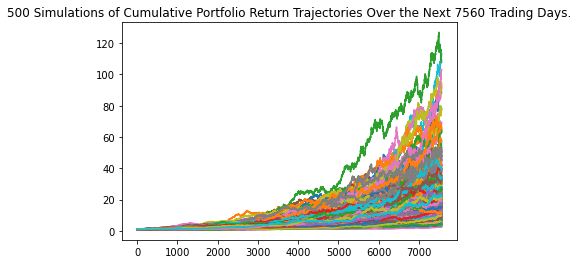

In [19]:
# Plot simulation outcomes

line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

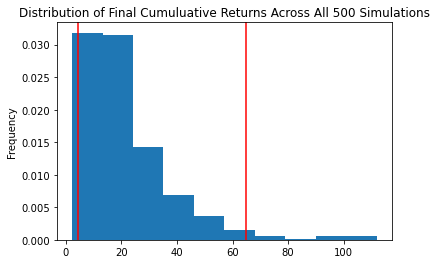

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig("MC_probability_sim_plot.png", bbox_inches="tight")

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean             21.775489
std              16.405681
min               2.387748
25%              10.574968
50%              17.711738
75%              26.948578
max             111.724043
95% CI Lower      4.435807
95% CI Upper     64.955719
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88716.15 and $1299114.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133074.22 and $1948671.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.0100  109.08   1681516.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-06-27 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-06-28 00:00:00-04:00     0.000182  242.50  243.715  242.230  243.46   
2017-06-29 00:00:00-04:00    -0.001912  243.66  243.720  239.955  241.39   
2017-06-30 00:00:00-04:00    -0.001368  242.26  242.710  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.380  242.290  242.32   

                                                    
                               volume daily_return  
time                                                
2017-06-27 00:00:00-04:00         NaN          NaN  
2017-06-28 00:00:00-04:00  50076355.0          NaN  
2017-06-29 00:00:00-04:00  87799860.0    -0.008502  
2017-06-30 00:00:00-04:00  50347309.0     0.001574  
2017-07-03 00:00:00-04:00  27234078.0     0.002275

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986966,0.993662,1.004318,1.004158,1.001482,1.001799,1.000512,1.001426,1.008250,0.993332,...,1.020998,0.989416,1.003978,1.002538,1.015163,1.001777,0.991339,0.991147,0.998158,1.005185
2,0.988952,0.994674,1.012884,1.012149,1.009341,1.008833,1.013063,0.990897,1.005943,0.987418,...,1.033820,0.987062,1.002448,1.000567,1.017095,1.001649,0.980533,0.997847,0.996704,1.002094
3,1.003632,1.004438,1.005571,1.022658,1.018782,1.016057,1.022812,0.979183,0.991423,0.994458,...,1.025347,0.982780,1.009670,0.996195,1.013641,1.009089,0.986716,1.004732,0.991440,1.003446
4,0.997886,1.019371,1.012351,1.030609,1.018113,1.018322,1.028436,0.987962,0.996864,0.992501,...,1.023413,0.982577,1.015328,0.995854,1.022598,1.008489,0.973050,1.002674,0.992019,1.002396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.117625,1.467043,1.668990,1.580574,1.575676,1.614948,1.194323,1.103149,1.714142,1.425455,...,1.805119,2.177028,1.751095,1.621121,1.422267,1.354488,1.911783,1.740784,1.694855,1.468452
1257,1.122864,1.448108,1.672494,1.590813,1.582364,1.604882,1.204831,1.099252,1.737194,1.430607,...,1.809675,2.171468,1.799005,1.648352,1.443374,1.322460,1.909346,1.724401,1.677321,1.461989
1258,1.118607,1.448104,1.684531,1.599367,1.592455,1.596084,1.204910,1.104728,1.740898,1.429319,...,1.835068,2.193268,1.792664,1.650890,1.445284,1.331461,1.906312,1.716926,1.678599,1.458284
1259,1.116906,1.449498,1.682447,1.608336,1.609730,1.605969,1.197116,1.101426,1.734297,1.436052,...,1.858396,2.179781,1.765392,1.652280,1.441484,1.350030,1.917390,1.715730,1.699450,1.461691


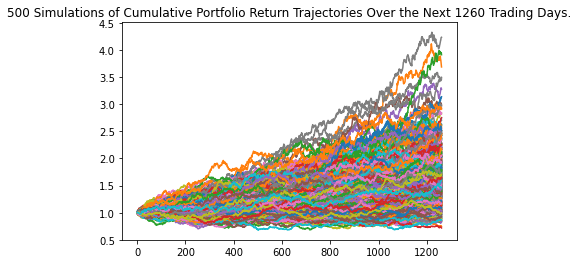

In [26]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()
line_plot_five.get_figure().savefig("MC_fiveyears_sim_plot.png", bbox_inches="tight")

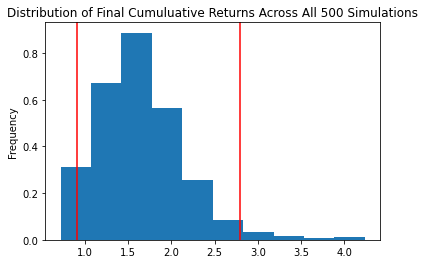

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()
dist_plot_five.get_figure().savefig("MC_fiveyears_probability_sim_plot.png", bbox_inches="tight")

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()


# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.645057
std               0.498276
min               0.718158
25%               1.313333
50%               1.573999
75%               1.917938
max               4.236095
95% CI Lower      0.908241
95% CI Upper      2.791651
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)
 
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54494.49 and $167499.08


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.0100  109.08   1681516.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-06-27 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-06-28 00:00:00-04:00     0.000182  242.50  243.715  242.230  243.46   
2017-06-29 00:00:00-04:00    -0.001912  243.66  243.720  239.955  241.39   
2017-06-30 00:00:00-04:00    -0.001368  242.26  242.710  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.380  242.290  242.32   

                                                    
                               volume daily_return  
time                                                
2017-06-27 00:00:00-04:00         NaN          NaN  
2017-06-28 00:00:00-04:00  50076355.0          NaN  
2017-06-29 00:00:00-04:00  87799860.0    -0.008502  
2017-06-30 00:00:00-04:00  50347309.0     0.001574  
2017-07-03 00:00:00-04:00  27234078.0     0.002275

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007876,1.004072,1.001531,1.000386,1.011989,0.992887,0.997046,1.006178,1.009202,0.998546,...,1.004986,0.992723,0.996738,1.001160,1.010223,0.994110,0.993805,1.001010,1.010794,0.996037
2,0.989673,1.004143,1.013184,1.001391,1.004646,0.996003,1.004202,1.004442,1.008972,0.999194,...,0.987239,1.001451,0.993312,1.012814,1.006020,1.013161,0.997411,0.991694,1.009755,1.002663
3,0.973192,1.012262,1.009819,0.988809,1.000767,1.005174,0.993513,0.999794,1.012583,0.994745,...,0.983665,1.001052,0.991352,0.995728,1.010430,1.016475,0.996525,0.995762,1.011122,1.004029
4,0.969874,1.009132,1.000568,0.988680,1.004534,0.979719,0.984781,0.991752,1.007188,0.991558,...,0.983371,1.015523,0.977286,1.000039,1.002748,1.015278,1.002910,0.993036,1.008161,1.012435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.152632,1.294815,2.709669,1.806716,3.078070,3.759174,1.195180,2.456273,2.950558,2.288053,...,2.638226,1.558625,2.816730,1.458299,0.790081,2.061618,1.170497,4.525856,2.175176,2.729237
2517,1.170021,1.314702,2.651433,1.818343,3.083617,3.806814,1.195922,2.416753,2.963819,2.281089,...,2.634841,1.551224,2.867365,1.459097,0.801876,2.074696,1.163974,4.549120,2.197578,2.735091
2518,1.155010,1.320809,2.655641,1.832275,3.091277,3.784017,1.196728,2.414771,2.975902,2.262763,...,2.647135,1.548550,2.851528,1.446845,0.805469,2.053992,1.168807,4.574357,2.222919,2.770513
2519,1.148459,1.322770,2.683202,1.836015,3.067661,3.746177,1.202876,2.419768,2.944981,2.239782,...,2.649331,1.542797,2.880444,1.433892,0.806951,2.042443,1.173596,4.550596,2.218829,2.801204


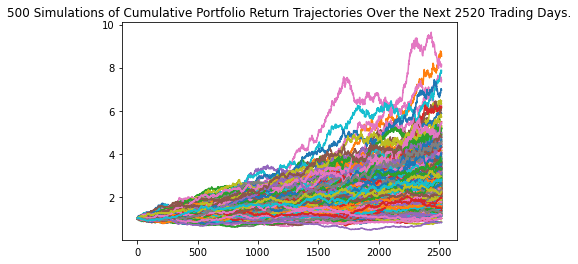

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()
line_plot_ten.get_figure().savefig("MC_tenyears_sim_plot.png", bbox_inches="tight")

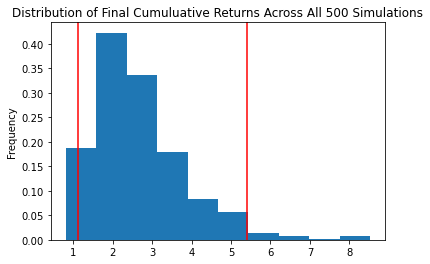

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()
dist_plot_ten.get_figure().savefig("MC_tenyears_probability_sim_plot.png", bbox_inches="tight")

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()


# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.668190
std               1.176182
min               0.810029
25%               1.871178
50%               2.396521
75%               3.263365
max               8.528445
95% CI Lower      1.122803
95% CI Upper      5.408021
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)
 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67368.21 and $324481.27
